In [1]:
import shap
shap.initjs()  # notebook环境下，加载用于可视化的JS代码
import xgboost

# 忽略警告
import warnings
warnings.filterwarnings("ignore")

In [2]:
# 加载数据
import pandas as pd
data = pd.read_csv(r'C:\Users\dell\PAH\fangjia5.csv')

In [3]:
# 我们先训练好一个XGBoost model
# 提取特征和目标变量
X = data.iloc[:, :-1]  # 选择除了最后一列之外的所有列作为特征
y = data.iloc[:, -1]   # 选择最后一列作为目标变量

# 显示特征和目标变量的形状
print("特征 X 的形状:", X.shape)
print("目标变量 y 的形状:", y.shape)


特征 X 的形状: (452, 11)
目标变量 y 的形状: (452,)


In [4]:
model = xgboost.train({"learning_rate": 0.5}, xgboost.DMatrix(X, label=y), 450)
# Remove rows with missing values in the target column

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)  # 传入特征矩阵X，计算SHAP值

In [5]:

# 可视化第一个prediction的解释   如果不想用JS,传入matplotlib=True
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])

In [6]:
X

,PD,ADP,EL,PIP,SL,pH,FR,PC,C,T,DO
0,992.250,9.92250,6.575,6.575,65.2,4.0900,15.3,396.90,6.575,992.250,4.98
1,992.250,9.92250,6.421,6.421,78.9,4.9671,17.8,396.90,6.421,992.250,9.14
2,982.075,9.82075,7.185,7.185,61.1,4.9671,17.8,392.83,7.185,982.075,4.03
3,986.575,9.86575,6.998,6.998,45.8,6.0622,18.7,394.63,6.998,986.575,2.94
4,992.250,9.92250,7.147,7.147,54.2,6.0622,18.7,396.90,7.147,992.250,5.33
...,...,...,...,...,...,...,...,...,...,...,...
447,391.990,3.91990,6.593,6.593,69.1,2.4786,21.0,391.99,6.593,391.990,9.67
448,396.900,3.96900,6.120,6.120,76.7,2.2875,21.0,396.90,6.120,396.900,9.08
449,396.900,3.96900,6.976,6.976,91.0,2.1675,21.0,396.90,6.976,396.900,5.64
450,393.450,3.93450,6.794,6.794,89.3,2.3889,21.0,393.45,6.794,393.450,6.48


In [7]:
y_base = explainer.expected_value
print(y_base)

pred = model.predict(xgboost.DMatrix(X))
print(pred.mean())

23.750439
23.750444


In [8]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
447    22.4
448    20.6
449    23.9
450    22.0
451    11.9
Name: Y, Length: 452, dtype: float64

In [9]:
shap.force_plot(explainer.expected_value, shap_values, X)

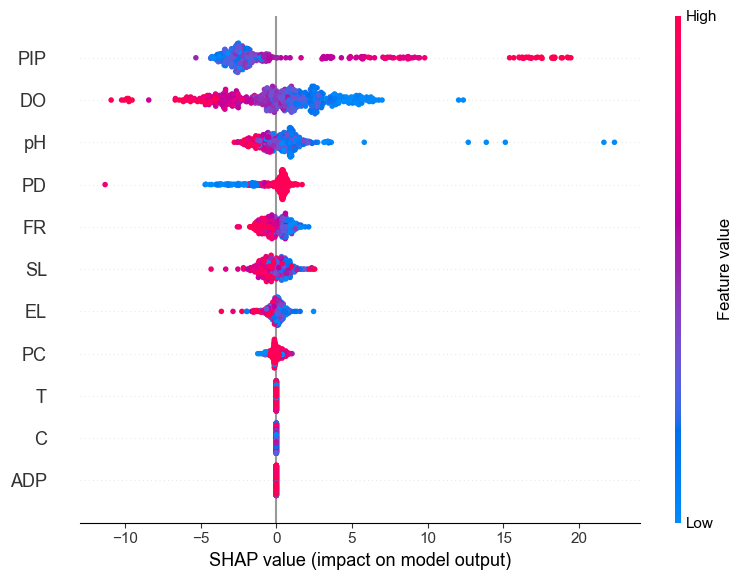

In [10]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

# Set the font to Arial
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']

# Summarize the effects of all features with custom font
shap.summary_plot(shap_values, X)

# Show the plot
plt.show()


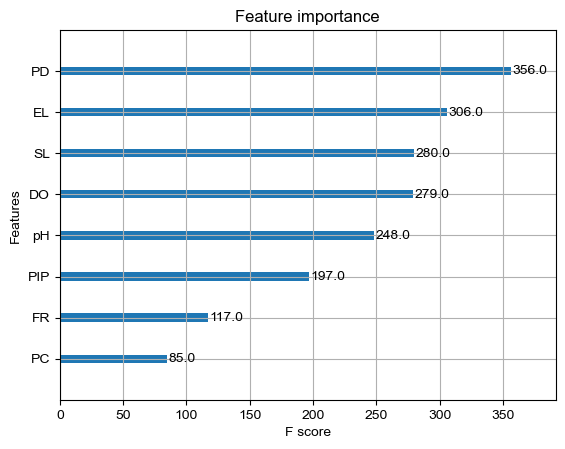

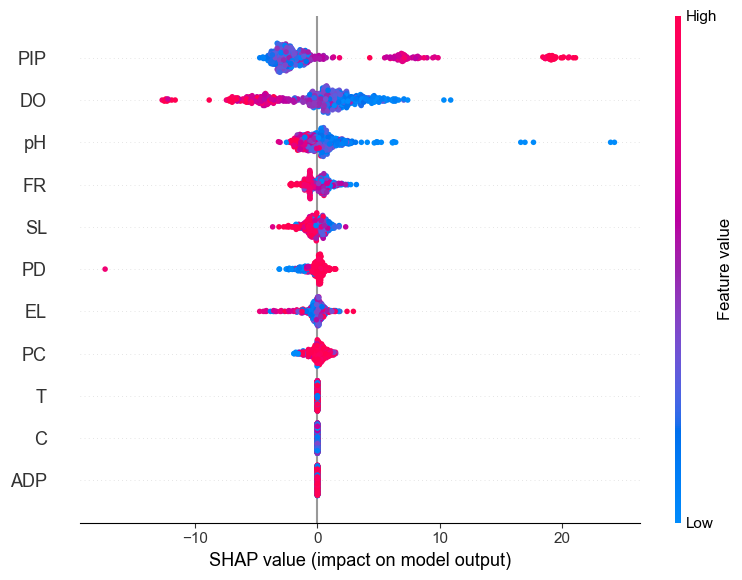

In [11]:
import pandas as pd
import xgboost
import shap
import matplotlib.pyplot as plt
from matplotlib import rcParams

# Load your dataset
data = pd.read_csv(r'C:\Users\dell\PAH\fangjia5.csv')

# Extract features and target variable
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Train XGBoost model
model = xgboost.train({"learning_rate": 1}, xgboost.DMatrix(X, label=y), 450)

# SHAP explanations
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

# Plot feature importance
xgboost.plot_importance(model)
plt.show()

# Plot SHAP summary plot
shap.summary_plot(shap_values, X)
plt.show()

